In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("./kospi.xlsx", engine="openpyxl",usecols=[0, 1, 2, 3, 4], index_col="Date")

In [ ]:
## 변동 파생변수 
df["change"] = df['High'] - df['Low']

In [ ]:
## 전일변동
df["전일변동"] = df['change'].shift(1)

In [ ]:
df["목표가"] = df["Open"] + df['전일변동'] * 0.5

In [ ]:
df.head(10)

In [ ]:
import numpy as np

In [ ]:
# np.where(조건식, 참인경우 결과, 거짓인 경우 결과)
df["수익률"] = np.where(df['High'] >= df['목표가'], df["Close"]/df['목표가'], 1)

In [ ]:
# 누적수익률
# 누적곱 -> cumprod()
df['누적수익률'] = df['수익률'].cumprod()
df.tail()

In [ ]:
## CAGR
## 누적수익률 ** (1 / (투자기간/365)) - 1
## 시계열데이터 활용 
## 기간을 구할때는  (마이너스) 사용하면 기간 출력 가능
delta = df.index[-1] - df.index[0]
year = delta.days / 365
CAGR = df['누적수익률'].iloc[-1] ** ( 1 / year ) - 1
print("CAGR : ", CAGR * 100)


In [ ]:
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin":
    plt.rc("font", family='AppleGothic')
else:
    plt.rc("font", family="Malgun Gothic")

plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df["누적수익률"], label = '변동성돌파')
plt.plot(df["Close"]/df['Close'].iloc[0]  ,  label="단순보유")
plt.legend()
plt.show()

In [ ]:
## MDD 출력 -> 시각화
df['전고점'] = df['누적수익률'].cummax()
df['DD'] = (1 - df['누적수익률'] / df['전고점']) * 100
df.tail()

In [ ]:
plt.figure(figsize=(16, 4))
plt.grid(True, axis='y')
plt.plot(df['DD'] * - 1)
plt.fill_between(df.index, df['DD'] * -1, alpha=0.3)
plt.show()

In [ ]:
print("MDD : ", df['DD'].max())

In [ ]:
# 10일치의 이동 평균선 대입
df['MA10'] = df['Close'].rolling(10).mean()
df.iloc[8:15]

In [ ]:
df["매매신호"] = df["Open"] > df['MA10'].shift(1)

In [ ]:
df["수익률2"] = np.where(
    (df['매매신호'] == 1) & (df['High'] >= df['목표가']), 
    df['Close'] / df['목표가'], 
    1
)

In [ ]:
df['누적수익률2'] = df['수익률2'].cumprod()

In [ ]:
df["누적수익률2"].iloc[-1]

In [ ]:
plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df['누적수익률'], label = "변동성돌파")
plt.plot(df['누적수익률2'], label = '변동성돌파(마켓)')
plt.plot(df['Close'] / df['Close'].iloc[0] , label="단순보유")
plt.legend()
plt.show()

In [ ]:
df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2'] / df['전고점2']) * 100

In [ ]:
df['DD2'].max()

C:\Users\moons\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


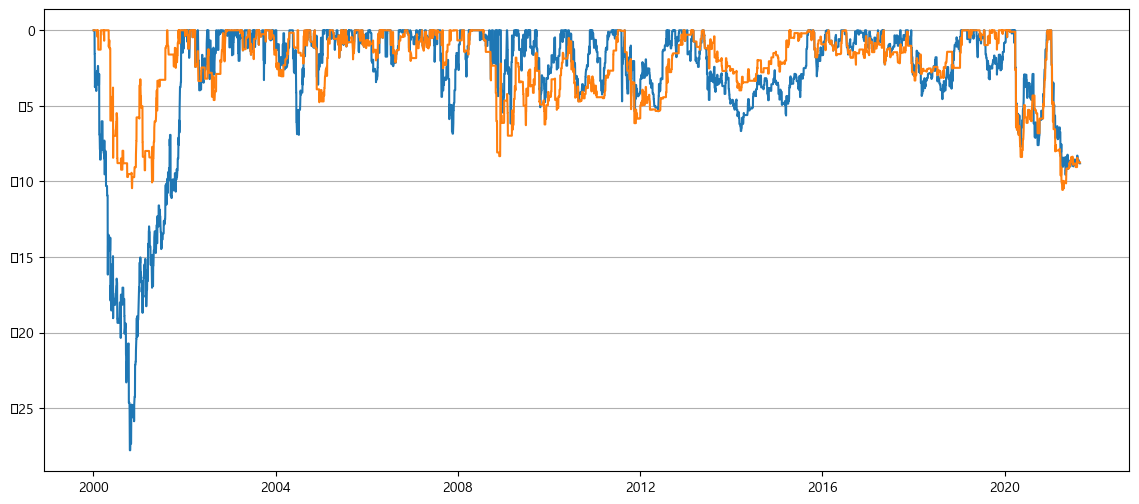

In [37]:
plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df["DD"] * -1, label="VB")
plt.plot(df['DD2'] * -1, label="VBM")
plt.show()